In [1]:
# Ahmet Berkay Aslan c1911009
# Buğra Mutluer      c1911040

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, matthews_corrcoef
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('4_NeverGonnaMineAgain - CENG464 Project - Data.xlsx')  # Read xlsx
data_original = data
data

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0,0,0,1,1,0,0,1,0,0,...,5,5,5,5,5,5,5,3,3,A
1,1,0,0,1,0,0,1,0,0,1,...,4,2,4,2,2,2,2,3,3,D
2,1,1,0,1,0,0,1,1,0,1,...,4,4,?,?,4,2,4,4,1,A
3,0,0,0,0,0,0,0,0,0,0,...,?,?,?,?,?,?,?,3,3,C
4,1,1,0,1,0,0,1,1,0,1,...,?,?,1,1,?,?,?,3,3,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,0,1,0,0,0,0,1,1,1,0,...,2,2,3,3,2,1,1,1,3,B
6104,0,1,0,1,0,0,0,1,0,0,...,?,?,?,?,?,?,?,3,3,A
6105,1,0,1,0,0,0,0,0,0,1,...,4,1,5,4,5,4,5,5,2,A
6106,0,0,1,0,0,0,0,1,0,0,...,1,3,4,5,3,2,3,2,3,A


# Data Cleaning

In [3]:
#Replace ?, D with nun inorder to impute

data.replace('?', np.nan, inplace=True)
data['Q16'].replace("D", np.nan, inplace=True)
data

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0,0,0,1,1,0,0,1,0,0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3,3,A
1,1,0,0,1,0,0,1,0,0,1,...,4.0,2.0,4.0,2.0,2.0,2.0,2.0,3,3,NaN
2,1,1,0,1,0,0,1,1,0,1,...,4.0,4.0,NaN,NaN,4.0,2.0,4.0,4,1,A
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,C
4,1,1,0,1,0,0,1,1,0,1,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,3,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,0,1,0,0,0,0,1,1,1,0,...,2.0,2.0,3.0,3.0,2.0,1.0,1.0,1,3,B
6104,0,1,0,1,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,A
6105,1,0,1,0,0,0,0,0,0,1,...,4.0,1.0,5.0,4.0,5.0,4.0,5.0,5,2,A
6106,0,0,1,0,0,0,0,1,0,0,...,1.0,3.0,4.0,5.0,3.0,2.0,3.0,2,3,A


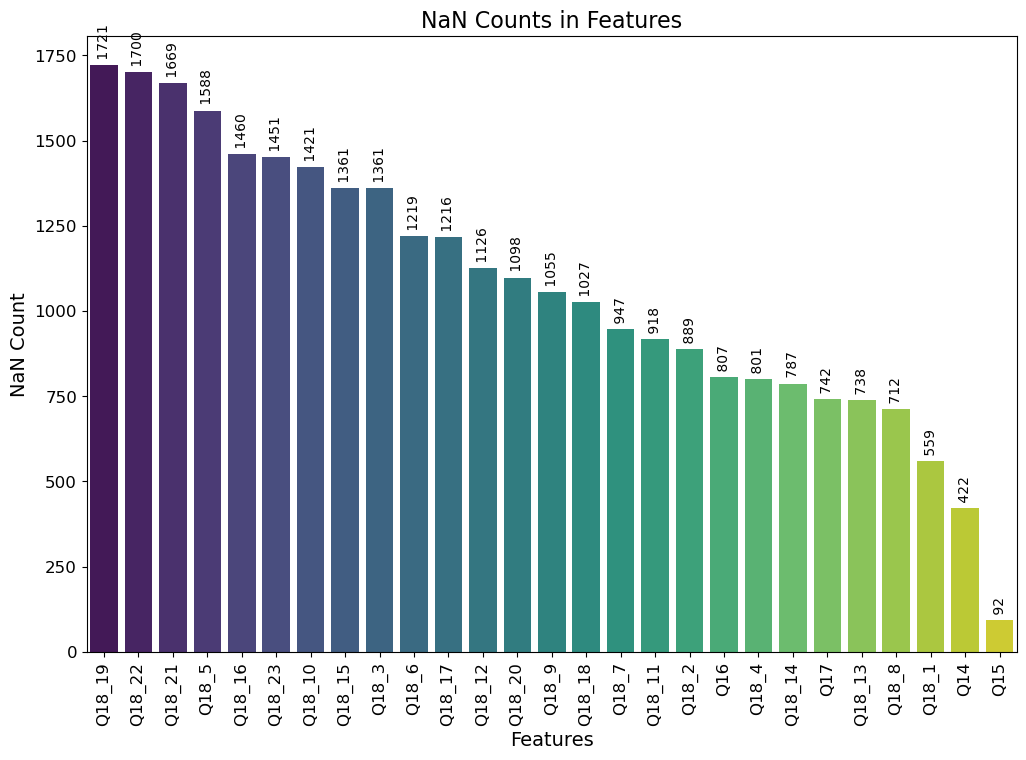

In [4]:
# Counting NaN values for each feature
nan_counts = data.isna().sum()


nan_features = nan_counts[nan_counts > 0].sort_values(ascending=False)

if not nan_features.empty:
   
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=nan_features.index, y=nan_features.values, palette='viridis')

    for idx, nan_count in enumerate(nan_features):
        ax.text(idx, nan_count + 5, f' {int(nan_count)}', ha='center', va='bottom', fontsize=10, rotation=90)

    plt.title('NaN Counts in Features', fontsize=16)
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('NaN Count', fontsize=14)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
else:
    print("No features with NaN values.")

In [5]:
#The number of Dont Know answer for each feature

count_feature_1 = data['Q11_Dont_Know'].sum()
count_feature_2 = data['Q12_Dont_Know'].sum()
count_feature_3 = data['Q13_Dont_Know'].sum()
print("The values which are 1 in the Feature1: ", count_feature_1) 
print("The values which are 1 in the Feature2: ", count_feature_2) 
print("The values which are 1 in the Feature3: ", count_feature_3) 

The values which are 1 in the Feature1:  403
The values which are 1 in the Feature2:  229
The values which are 1 in the Feature3:  342


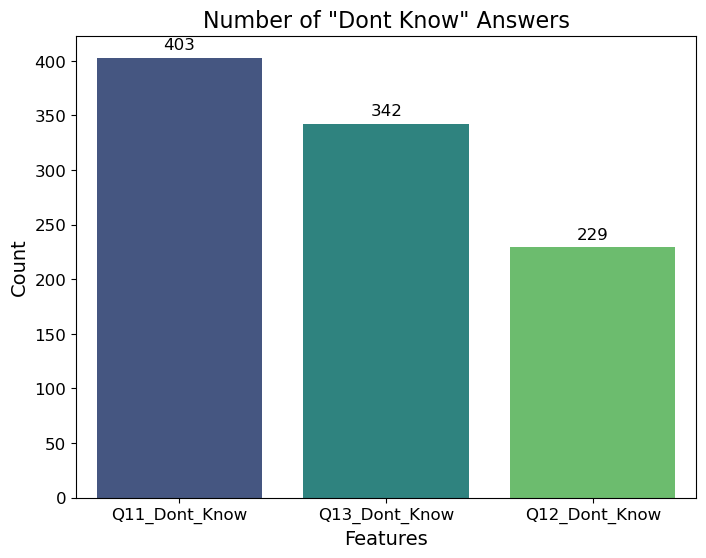

In [6]:
# Counting '1' values in each 'Dont Know' feature
count_feature_1 = data['Q11_Dont_Know'].sum()
count_feature_2 = data['Q12_Dont_Know'].sum()
count_feature_3 = data['Q13_Dont_Know'].sum()

count_df = pd.DataFrame({'Feature': ['Q11_Dont_Know', 'Q12_Dont_Know', 'Q13_Dont_Know'],
                         'Count': [count_feature_1, count_feature_2, count_feature_3]})

count_df = count_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Feature', y='Count', data=count_df, palette='viridis')

for idx, count in enumerate(count_df['Count']):
    plt.text(idx, count + 5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Number of "Dont Know" Answers', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [7]:
#Replace all Dont Know related features valuses nan in order to impute

selected_rows = data[data['Q11_Dont_Know'] == 1]
selected_features = ['Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q11_7', 'Q11_8', 'Q11_9', 'Q11_10', 'Q11_11', 'Q11_12', 'Q11_13']
data.loc[selected_rows.index, selected_features] = np.nan
selected_rows = data[data['Q12_Dont_Know'] == 1]
selected_features = ['Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14']
data.loc[selected_rows.index, selected_features] = np.nan
selected_rows = data[data['Q13_Dont_Know'] == 1]
selected_features = ['Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16']
data.loc[selected_rows.index, selected_features] = np.nan
data['Q15'].replace("3", np.nan, inplace=True)
data['Q17'].replace("6", np.nan, inplace=True)
data = data.drop('Q11_Dont_Know', axis=1)
data = data.drop('Q12_Dont_Know', axis=1)
data = data.drop('Q13_Dont_Know', axis=1)
data

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3,3,A
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,4.0,2.0,4.0,2.0,2.0,2.0,2.0,3,3,NaN
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,4.0,4.0,NaN,NaN,4.0,2.0,4.0,4,1,A
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,C
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,3,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,2.0,3.0,3.0,2.0,1.0,1.0,1,3,B
6104,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,A
6105,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,1.0,5.0,4.0,5.0,4.0,5.0,5,2,A
6106,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,4.0,5.0,3.0,2.0,3.0,2,3,A


In [8]:
#Impute inorder to replace the nan values with estimating via KNN
mapping = {'A': 0, 'B': 1, 'C': 2}
data['Q16'] = data['Q16'].map(mapping)

imputer = KNNImputer(n_neighbors=10)
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data['Q16'] = data['Q16'].round()
data

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,4.0,2.0,4.0,2.0,2.0,2.0,2.0,3.0,3.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,4.0,4.0,3.6,2.2,4.0,2.0,4.0,4.0,1.0,0.0
3,0.7,0.5,0.1,0.6,0.1,0.0,0.4,0.4,0.0,0.4,...,2.4,2.4,2.7,2.5,2.5,2.1,2.3,3.0,3.0,2.0
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,3.1,2.0,1.0,1.0,2.7,2.1,2.1,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,3.0,1.0
6104,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.2,2.2,3.4,2.2,3.0,2.9,2.8,3.0,3.0,0.0
6105,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,1.0,5.0,4.0,5.0,4.0,5.0,5.0,2.0,0.0
6106,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,4.0,5.0,3.0,2.0,3.0,2.0,3.0,0.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6108 entries, 0 to 6107
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q11_1   6108 non-null   float64
 1   Q11_2   6108 non-null   float64
 2   Q11_3   6108 non-null   float64
 3   Q11_4   6108 non-null   float64
 4   Q11_5   6108 non-null   float64
 5   Q11_6   6108 non-null   float64
 6   Q11_7   6108 non-null   float64
 7   Q11_8   6108 non-null   float64
 8   Q11_9   6108 non-null   float64
 9   Q11_10  6108 non-null   float64
 10  Q11_11  6108 non-null   float64
 11  Q11_12  6108 non-null   float64
 12  Q11_13  6108 non-null   float64
 13  Q12_1   6108 non-null   float64
 14  Q12_2   6108 non-null   float64
 15  Q12_3   6108 non-null   float64
 16  Q12_4   6108 non-null   float64
 17  Q12_5   6108 non-null   float64
 18  Q12_6   6108 non-null   float64
 19  Q12_7   6108 non-null   float64
 20  Q12_8   6108 non-null   float64
 21  Q12_9   6108 non-null   float64
 22  

In [10]:
q16_column = data['Q16']
data = data.drop('Q16', axis=1)

unique_values = q16_column.nunique()
q16_column = q16_column.replace({1: 0, 2: 1})

print("The number of the Target values: ", unique_values,"\n")
print(q16_column.value_counts())

The number of the Target values:  3 

0.0    5005
1.0    1103
Name: Q16, dtype: int64


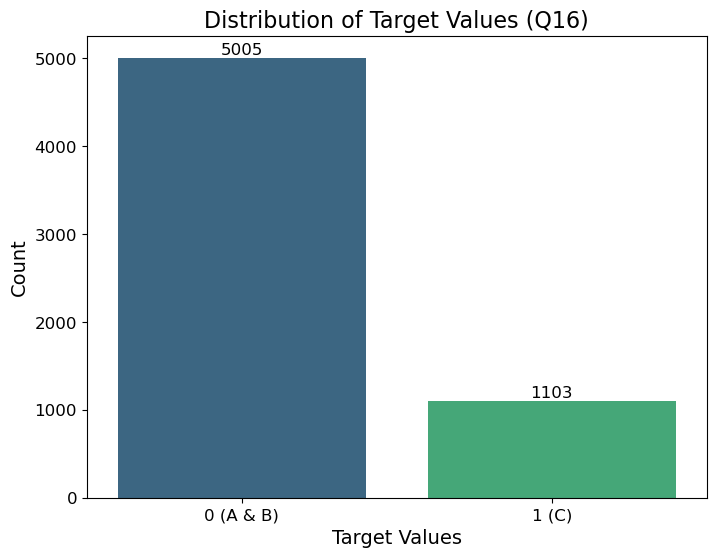

In [11]:
# Plotting the bar chart for the Target values (Q16) with counts on top
plt.figure(figsize=(8, 6))
sns.countplot(x=q16_column, palette='viridis')


for idx, count in enumerate(q16_column.value_counts()):
    plt.text(idx, count + 5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Target Values (Q16)', fontsize=16)
plt.xlabel('Target Values', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['0 (A & B)', '1 (C)'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [12]:
#Finding the best 60 Features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=60)
X_chi2 = selector.fit_transform(data, q16_column)

selected_indices = selector.get_support(indices=True)
selected_features = data.columns[selected_indices]

X_filtered = data[selected_features]
data = X_filtered

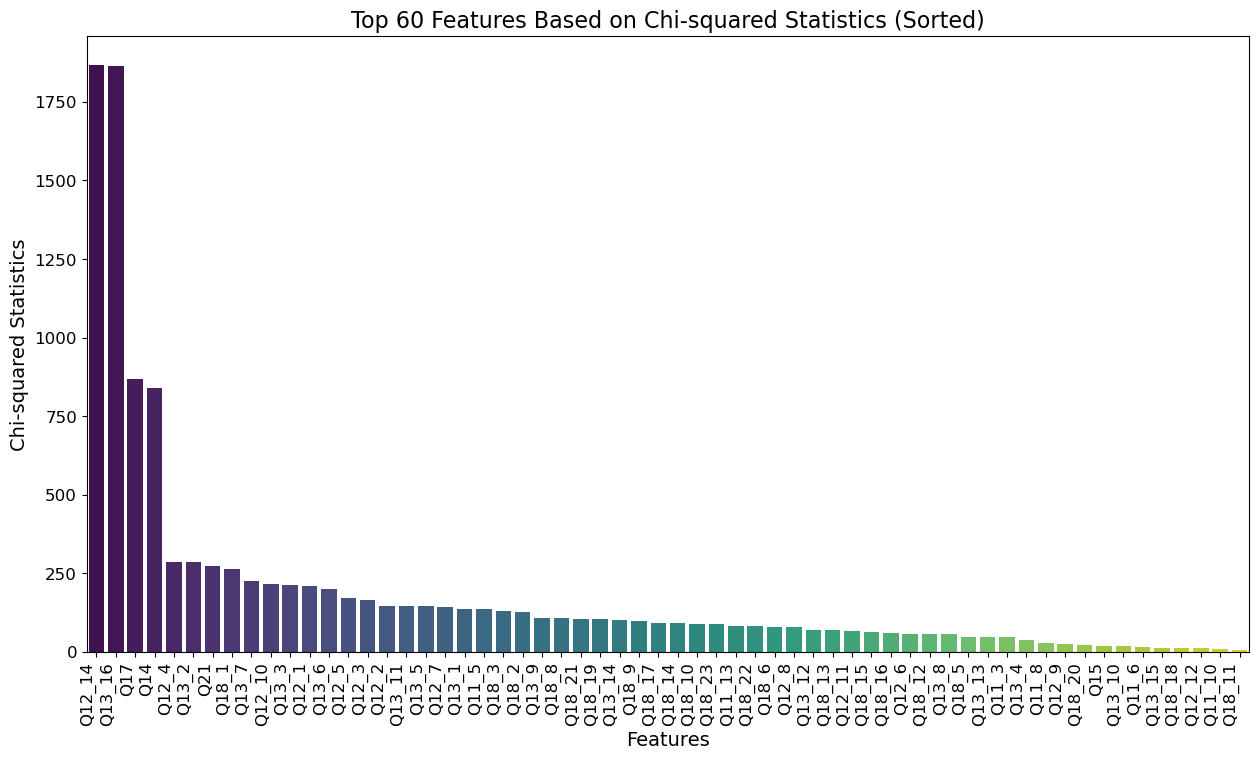

In [13]:
visualization_df = pd.DataFrame(data[selected_features])

sorted_indices = np.argsort(selector.scores_[selected_indices])[::-1]

plt.figure(figsize=(15, 8))
sns.barplot(x=visualization_df.columns[sorted_indices], y=selector.scores_[selected_indices][sorted_indices], palette='viridis')
plt.title('Top 60 Features Based on Chi-squared Statistics (Sorted)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Chi-squared Statistics', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [14]:
#Printing the best 60 Features
featurescores = selector.scores_[selected_indices]


sorted_indices = np.argsort(featurescores)[::-1]

for idx in sorted_indices:
    feature = selected_features[idx]
    score = featurescores[idx]
    print(f"{feature}: {score}")

Q12_14: 1866.980032937761
Q13_16: 1863.1859156038968
Q17: 868.18868458439
Q14: 839.2014545838776
Q12_4: 286.1594834978319
Q13_2: 285.86987562304796
Q21: 273.90092796176464
Q18_1: 264.52191714378756
Q13_7: 224.23361256084362
Q12_10: 215.51184046229926
Q13_3: 212.34192687732704
Q12_1: 211.1352721451881
Q13_6: 201.07494367677884
Q12_5: 171.35403303214665
Q12_3: 164.44117461088135
Q12_2: 145.33564827312972
Q13_11: 145.31988768931063
Q13_5: 144.62175374313563
Q12_7: 143.44374054325297
Q13_1: 135.33562079716657
Q11_5: 135.13906045911594
Q18_3: 130.90888470731096
Q18_2: 125.39160681975518
Q13_9: 109.2708162341621
Q18_8: 106.19588737699789
Q18_21: 104.36896178325861
Q18_19: 103.46981616053125
Q13_14: 102.4537834238318
Q18_9: 96.64358320032798
Q18_17: 92.09249488848502
Q18_14: 91.05180534230144
Q18_10: 88.76497585861148
Q18_23: 87.16834327635658
Q11_13: 83.08527887082269
Q18_22: 81.62294192701374
Q18_6: 78.39403747807289
Q12_8: 77.61902784028709
Q13_12: 69.01990101990035
Q18_13: 67.974985882908

In [15]:
print(selected_features)

Index(['Q11_3', 'Q11_5', 'Q11_6', 'Q11_8', 'Q11_10', 'Q11_13', 'Q12_1',
       'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9',
       'Q12_10', 'Q12_11', 'Q12_12', 'Q12_14', 'Q13_1', 'Q13_2', 'Q13_3',
       'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10',
       'Q13_11', 'Q13_12', 'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16', 'Q14',
       'Q15', 'Q17', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_5', 'Q18_6', 'Q18_8',
       'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12', 'Q18_13', 'Q18_14', 'Q18_15',
       'Q18_16', 'Q18_17', 'Q18_18', 'Q18_19', 'Q18_20', 'Q18_21', 'Q18_22',
       'Q18_23', 'Q21'],
      dtype='object')


In [16]:
data

,Q11_3,Q11_5,Q11_6,Q11_8,Q11_10,Q11_13,Q12_1,Q12_2,Q12_3,Q12_4,...,Q18_15,Q18_16,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q21
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,2.0,2.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,3.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3.7,3.8,4.0,4.0,3.6,2.2,4.0,2.0,4.0,1.0
3,0.1,0.1,0.0,0.4,0.4,0.0,0.0,0.0,0.0,0.0,...,3.1,2.8,2.4,2.4,2.7,2.5,2.5,2.1,2.3,3.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0,1.7,3.1,2.0,1.0,1.0,2.7,2.1,2.1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,1.0,3.0
6104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.8,2.9,3.2,2.2,3.4,2.2,3.0,2.9,2.8,3.0
6105,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,2.0,3.0,4.0,1.0,5.0,4.0,5.0,4.0,5.0,2.0
6106,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,3.0,1.0,3.0,4.0,5.0,3.0,2.0,3.0,3.0


In [17]:
#SMOTE oversampling inorder to balance the dataset

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X1 = data  
Y1 = q16_column  

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X1_resampled, Y1_resampled = smote.fit_resample(X1_train, Y1_train)

print(Y1_resampled.value_counts())

0.0    4001
1.0    4001
Name: Q16, dtype: int64


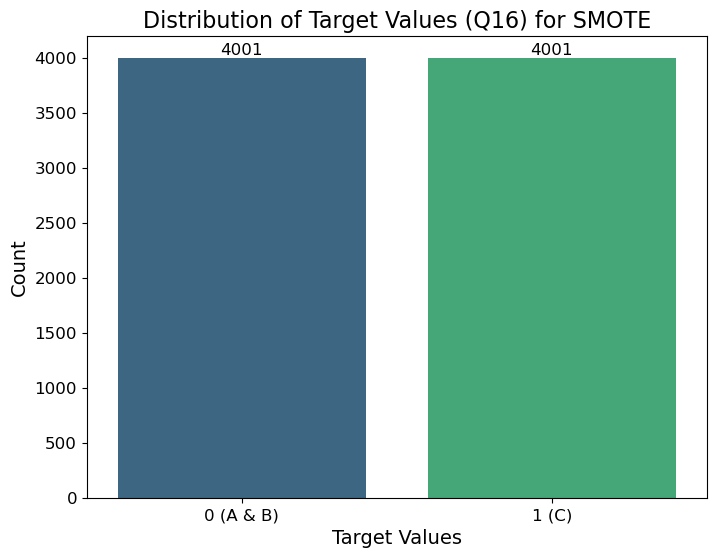

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x=Y1_resampled, palette='viridis')

for idx, count in enumerate(Y1_resampled.value_counts()):
    plt.text(idx, count + 5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Target Values (Q16) for SMOTE', fontsize=16)
plt.xlabel('Target Values', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['0 (A & B)', '1 (C)'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [19]:
#Random Oversampling inorder to balance the dataset
from sklearn.utils import resample

X2 = data
Y2 = q16_column

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

majority_class = '0' 
minority_classes = '1'

oversampled_data = pd.concat([resample(X2_train[Y2_train == cls], replace=True, n_samples=len(X2_train[Y2_train == majority_class]), random_state=42) for cls in minority_classes])


X2_oversampled = pd.concat([X2_train, oversampled_data])
Y2_oversampled = pd.concat([Y2_train, pd.Series([majority_class]*len(oversampled_data), index=oversampled_data.index)])

print(Y2_oversampled.value_counts())

0.0    4001
1.0     885
dtype: int64


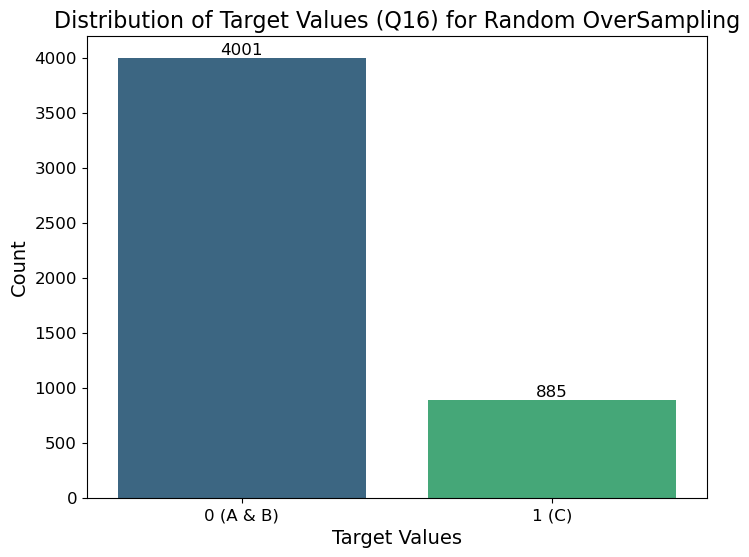

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x=Y2_oversampled, palette='viridis')

for idx, count in enumerate(Y2_oversampled.value_counts()):
    plt.text(idx, count + 5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Target Values (Q16) for Random OverSampling', fontsize=16)
plt.xlabel('Target Values', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['0 (A & B)', '1 (C)'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [21]:
#Renaming the Target column and the Features columns.
Y = q16_column
X = data

## random forest

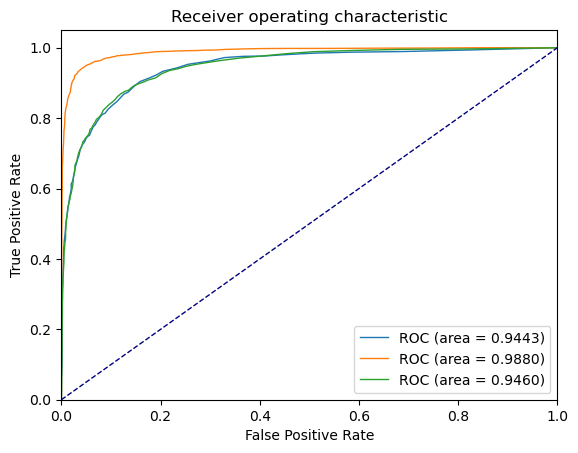


#-------------------Original Data--------------------#

Classification Accuracy: 0.9160
AUC: 0.8159
F1 Score: 0.7392
Precision: 0.8414
Recall: 0.6591
MCC: 0.6973

#-------------------Smote Data--------------------#

Classification Accuracy: 0.9499
AUC: 0.9499
F1 Score: 0.9494
Precision: 0.9580
Recall: 0.9410
MCC: 0.8999

#-------------------Oversampling Data--------------------#

Classification Accuracy: 0.9147
AUC: 0.8159
F1 Score: 0.7372
Precision: 0.8333
Recall: 0.6610
MCC: 0.6937


------------Confusion Matrix for SMOTE----------

Confusion Matrix for SMOTE:
 [[3836  165]
 [ 236 3765]]


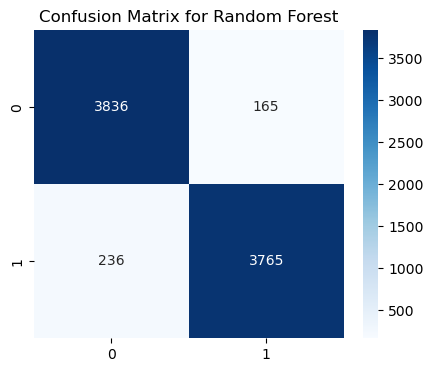

In [22]:
from sklearn.ensemble import RandomForestClassifier  

from sklearn.metrics import confusion_matrix

# 5-fold cross-validation
kf = KFold(n_splits=5, random_state=1000, shuffle=True)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#----------------Original--------------#
model = RandomForestClassifier(random_state=1000)  
y_pred = cross_val_predict(model, X, Y, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#--------------------smote----------------------#
model = RandomForestClassifier(random_state=1000)  
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#-------------------Oversampling-----------------------#
model = RandomForestClassifier(random_state=1000)  
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y2_oversampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#----------------Original--------------#
model = RandomForestClassifier(random_state=10000) 
y_pred = cross_val_predict(model, X, Y, cv=kf)
print("\n#-------------------Original Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y, y_pred))
print("F1 Score: %0.4f" % f1_score(Y, y_pred))
print("Precision: %0.4f" % precision_score(Y, y_pred))
print("Recall: %0.4f" % recall_score(Y, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y, y_pred))

#--------------------smote----------------------#
model = RandomForestClassifier(random_state=1000)  
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf)
print("\n#-------------------Smote Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y1_resampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y1_resampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y1_resampled, y_pred))
print("Precision: %0.4f" % precision_score(Y1_resampled, y_pred))
print("Recall: %0.4f" % recall_score(Y1_resampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y1_resampled, y_pred))

#-------------------Oversampling-----------------------#
model = RandomForestClassifier(random_state=5000)  
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf)
print("\n#-------------------Oversampling Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y2_oversampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y2_oversampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y2_oversampled, y_pred))
print("Precision: %0.4f" % precision_score(Y2_oversampled, y_pred))
print("Recall: %0.4f" % recall_score(Y2_oversampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y2_oversampled, y_pred))


print("\n\n------------Confusion Matrix for SMOTE----------\n")

#--------------------Confusion Matrix for SMOTE----------------------#
model = RandomForestClassifier(random_state=1000)  
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
y_pred = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(Y1_resampled, y_pred, labels=[0, 1])
print("Confusion Matrix for SMOTE:\n", cm)
df_cm = pd.DataFrame(cm, index=[i for i in "01"], columns=[i for i in "01"])
plt.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix for Random Forest")
plt.show()


## logistic regression

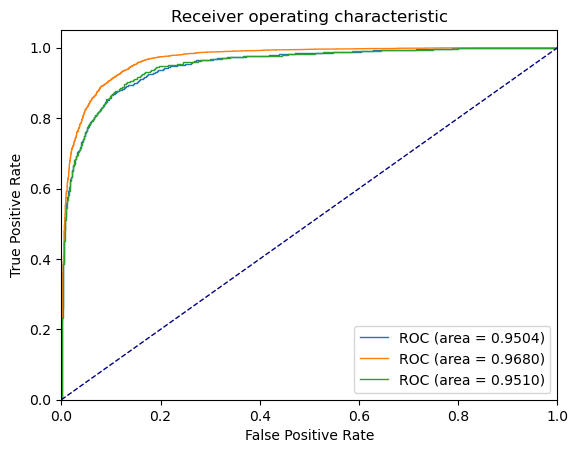


#-------------------Original Data--------------------#

Classification Accuracy: 0.9157
AUC: 0.8290
F1 Score: 0.7554
Precision: 0.8385
Recall: 0.6872
MCC: 0.7128

#-------------------Smote Data--------------------#

Classification Accuracy: 0.9019
AUC: 0.9041
F1 Score: 0.9031
Precision: 0.9131
Recall: 0.8933
MCC: 0.8085

#-------------------Oversampling Data--------------------#

Classification Accuracy: 0.9140
AUC: 0.8306
F1 Score: 0.7565
Precision: 0.8349
Recall: 0.6915
MCC: 0.7132


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 5-fold cross-validation
kf = KFold(n_splits=5, random_state=1000, shuffle=True)

#----------------Original--------------#
model = LogisticRegression()
model.fit(X, Y)  
y_pred = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(Y, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#--------------------smote----------------------#
model = LogisticRegression()
model.fit(X1_resampled, Y1_resampled) 
y_pred = model.predict_proba(X1_resampled)[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#-------------------Oversampling-----------------------#
model = LogisticRegression()
model.fit(X2_oversampled, Y2_oversampled)  
y_pred = model.predict_proba(X2_oversampled)[:, 1]
fpr, tpr, thresholds = roc_curve(Y2_oversampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#----------------Original--------------#
model = LogisticRegression()
model.fit(X, Y)  
y_pred = model.predict(X)
scores = cross_val_score(model, X, Y, cv=kf)  
print("\n#-------------------Original Data--------------------#\n")
print("Classification Accuracy: %0.4f" % scores.mean())
print("AUC: %0.4f" % roc_auc_score(Y, y_pred))
print("F1 Score: %0.4f" % f1_score(Y, y_pred))
print("Precision: %0.4f" % precision_score(Y, y_pred))
print("Recall: %0.4f" % recall_score(Y, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y, y_pred))

#--------------------smote----------------------#
model = LogisticRegression()
model.fit(X1_resampled, Y1_resampled) 
y_pred = model.predict(X1_resampled)
scores = cross_val_score(model,X1_resampled, Y1_resampled, cv=kf) 
print("\n#-------------------Smote Data--------------------#\n")
print("Classification Accuracy: %0.4f" % scores.mean())
print("AUC: %0.4f" % roc_auc_score(Y1_resampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y1_resampled, y_pred))
print("Precision: %0.4f" % precision_score(Y1_resampled, y_pred))
print("Recall: %0.4f" % recall_score(Y1_resampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y1_resampled, y_pred))

#-------------------Oversampling-----------------------#
model = LogisticRegression()
model.fit(X2_oversampled, Y2_oversampled)  
y_pred = model.predict(X2_oversampled)
scores = cross_val_score(model,X2_oversampled, Y2_oversampled, cv=kf)  
print("\n#-------------------Oversampling Data--------------------#\n")
print("Classification Accuracy: %0.4f" % scores.mean())
print("AUC: %0.4f" % roc_auc_score(Y2_oversampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y2_oversampled, y_pred))
print("Precision: %0.4f" % precision_score(Y2_oversampled, y_pred))
print("Recall: %0.4f" % recall_score(Y2_oversampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y2_oversampled, y_pred)) 


##  Gradient Boosting Classifier

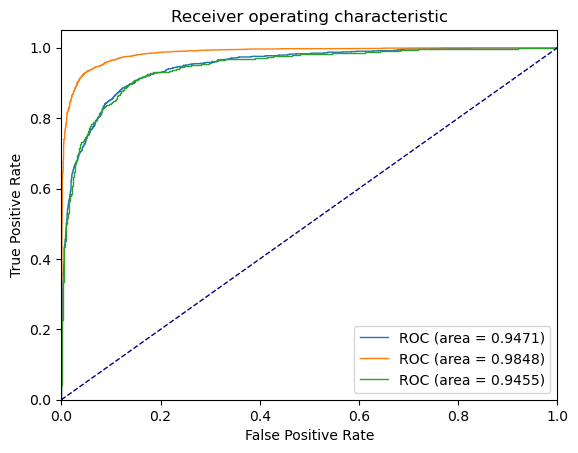


#-------------------Original Data--------------------#

Classification Accuracy: 0.9163
AUC: 0.8316
F1 Score: 0.7511
Precision: 0.8116
Recall: 0.6990
MCC: 0.7040

#-------------------Smote Data--------------------#

Classification Accuracy: 0.9396
AUC: 0.9396
F1 Score: 0.9394
Precision: 0.9433
Recall: 0.9355
MCC: 0.8793

#-------------------Oversampling Data--------------------#

Classification Accuracy: 0.9190
AUC: 0.8383
F1 Score: 0.7609
Precision: 0.8171
Recall: 0.7119
MCC: 0.7148


In [24]:
from sklearn.ensemble import GradientBoostingClassifier


# 5-fold cross-validation
kf = KFold(n_splits=5, random_state=1000, shuffle=True)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#----------------Original--------------#
model = GradientBoostingClassifier(random_state=10000)
y_pred = cross_val_predict(model, X, Y, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#--------------------smote----------------------#
model = GradientBoostingClassifier(random_state=1000)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#-------------------Oversampling-----------------------#
model = GradientBoostingClassifier(random_state=5000)
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y2_oversampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#----------------Original--------------#
model = GradientBoostingClassifier(random_state=10000)
y_pred = cross_val_predict(model, X, Y, cv=kf)
print("\n#-------------------Original Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y, y_pred))
print("F1 Score: %0.4f" % f1_score(Y, y_pred))
print("Precision: %0.4f" % precision_score(Y, y_pred))
print("Recall: %0.4f" % recall_score(Y, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y, y_pred))

#--------------------smote----------------------#
model = GradientBoostingClassifier(random_state=1000)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf)
print("\n#-------------------Smote Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y1_resampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y1_resampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y1_resampled, y_pred))
print("Precision: %0.4f" % precision_score(Y1_resampled, y_pred))
print("Recall: %0.4f" % recall_score(Y1_resampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y1_resampled, y_pred))

#-------------------Oversampling-----------------------#
model = GradientBoostingClassifier(random_state=5000)
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf)
print("\n#-------------------Oversampling Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y2_oversampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y2_oversampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y2_oversampled, y_pred))
print("Precision: %0.4f" % precision_score(Y2_oversampled, y_pred))
print("Recall: %0.4f" % recall_score(Y2_oversampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y2_oversampled, y_pred))

## knn

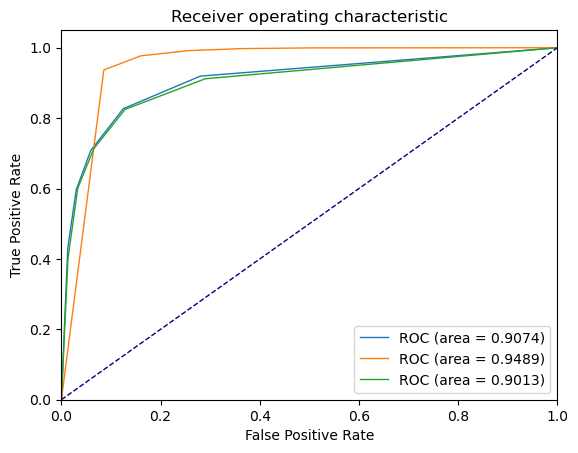


#-------------------Original Data--------------------#

Classification Accuracy: 0.8988
AUC: 0.8245
F1 Score: 0.7165
Precision: 0.7252
Recall: 0.7081
MCC: 0.6550

#-------------------Smote Data--------------------#

Classification Accuracy: 0.8677
AUC: 0.8677
F1 Score: 0.8823
Precision: 0.7946
Recall: 0.9918
MCC: 0.7591

#-------------------Oversampling Data--------------------#

Classification Accuracy: 0.8946
AUC: 0.8239
F1 Score: 0.7102
Precision: 0.7074
Recall: 0.7130
MCC: 0.6458


In [25]:
from sklearn.neighbors import KNeighborsClassifier


# 5-fold cross-validation
kf = KFold(n_splits=5, random_state=1000, shuffle=True)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#----------------Original--------------#
model = KNeighborsClassifier() ## neighbour = 5 
y_pred = cross_val_predict(model, X, Y, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#--------------------smote----------------------#
model = KNeighborsClassifier() ## neighbour = 5
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#-------------------Oversampling-----------------------#
model = KNeighborsClassifier() ## neighbour = 5
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y2_oversampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#----------------Original--------------#
model = KNeighborsClassifier() ## neighbour = 5
y_pred = cross_val_predict(model, X, Y, cv=kf)
print("\n#-------------------Original Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y, y_pred))
print("F1 Score: %0.4f" % f1_score(Y, y_pred))
print("Precision: %0.4f" % precision_score(Y, y_pred))
print("Recall: %0.4f" % recall_score(Y, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y, y_pred))

#--------------------smote----------------------#
model = KNeighborsClassifier() ## neighbour = 5
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf)
print("\n#-------------------Smote Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y1_resampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y1_resampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y1_resampled, y_pred))
print("Precision: %0.4f" % precision_score(Y1_resampled, y_pred))
print("Recall: %0.4f" % recall_score(Y1_resampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y1_resampled, y_pred))

#-------------------Oversampling-----------------------#
model = KNeighborsClassifier() ## neighbour = 5
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf)
print("\n#-------------------Oversampling Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y2_oversampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y2_oversampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y2_oversampled, y_pred))
print("Precision: %0.4f" % precision_score(Y2_oversampled, y_pred))
print("Recall: %0.4f" % recall_score(Y2_oversampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y2_oversampled, y_pred))



## decision tree

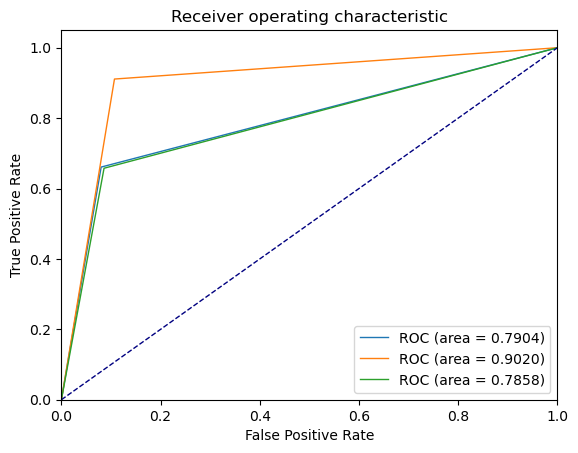


#-------------------Original Data--------------------#

Classification Accuracy: 0.8731
AUC: 0.7904
F1 Score: 0.6529
Precision: 0.6451
Recall: 0.6609
MCC: 0.5754

#-------------------Smote Data--------------------#

Classification Accuracy: 0.9020
AUC: 0.9020
F1 Score: 0.9029
Precision: 0.8949
Recall: 0.9110
MCC: 0.8042

#-------------------Oversampling Data--------------------#

Classification Accuracy: 0.8676
AUC: 0.7858
F1 Score: 0.6427
Precision: 0.6285
Recall: 0.6576
MCC: 0.5617


In [26]:

from sklearn.tree import DecisionTreeClassifier


# 5-fold cross-validation
kf = KFold(n_splits=5, random_state=1000, shuffle=True)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#----------------Original--------------#
model = DecisionTreeClassifier(random_state=100)
y_pred = cross_val_predict(model, X, Y, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#--------------------smote----------------------#
model = DecisionTreeClassifier(random_state=100)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#-------------------Oversampling-----------------------#
model = DecisionTreeClassifier(random_state=100)
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y2_oversampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#----------------Original--------------#
model = DecisionTreeClassifier(random_state=100)
y_pred = cross_val_predict(model, X, Y, cv=kf)
print("\n#-------------------Original Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y, y_pred))
print("F1 Score: %0.4f" % f1_score(Y, y_pred))
print("Precision: %0.4f" % precision_score(Y, y_pred))
print("Recall: %0.4f" % recall_score(Y, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y, y_pred))

#--------------------smote----------------------#
model = DecisionTreeClassifier(random_state=100)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf)
print("\n#-------------------Smote Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y1_resampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y1_resampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y1_resampled, y_pred))
print("Precision: %0.4f" % precision_score(Y1_resampled, y_pred))
print("Recall: %0.4f" % recall_score(Y1_resampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y1_resampled, y_pred))

#-------------------Oversampling-----------------------#
model = DecisionTreeClassifier(random_state=100)
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf)
print("\n#-------------------Oversampling Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y2_oversampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y2_oversampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y2_oversampled, y_pred))
print("Precision: %0.4f" % precision_score(Y2_oversampled, y_pred))
print("Recall: %0.4f" % recall_score(Y2_oversampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y2_oversampled, y_pred))




## SVM

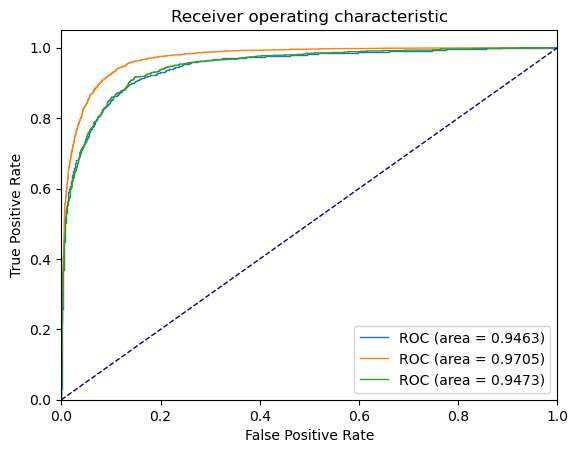


#-------------------Original Data--------------------#

Classification Accuracy: 0.9173
AUC: 0.8195
F1 Score: 0.7443
Precision: 0.8429
Recall: 0.6664
MCC: 0.7026

#-------------------Smote Data--------------------#

Classification Accuracy: 0.9124
AUC: 0.9124
F1 Score: 0.9125
Precision: 0.9119
Recall: 0.9130
MCC: 0.8248

#-------------------Oversampling Data--------------------#

Classification Accuracy: 0.9122
AUC: 0.8113
F1 Score: 0.7293
Precision: 0.8257
Recall: 0.6531
MCC: 0.6844


In [27]:

from sklearn import svm


# 5-fold cross-validation
kf = KFold(n_splits=5, random_state=1000, shuffle=True)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#----------------Original--------------#
model = svm.SVC(random_state=100, probability=True)
y_pred = cross_val_predict(model, X, Y, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#--------------------smote----------------------#
model = svm.SVC(random_state=100, probability=True)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#-------------------Oversampling-----------------------#
model = svm.SVC(random_state=100, probability=True)
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y2_oversampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#----------------Original--------------#
model = svm.SVC(random_state=100, probability=True)
y_pred = cross_val_predict(model, X, Y, cv=kf)
print("\n#-------------------Original Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y, y_pred))
print("F1 Score: %0.4f" % f1_score(Y, y_pred))
print("Precision: %0.4f" % precision_score(Y, y_pred))
print("Recall: %0.4f" % recall_score(Y, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y, y_pred))

#--------------------smote----------------------#
model = svm.SVC(random_state=100, probability=True)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf)
print("\n#-------------------Smote Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y1_resampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y1_resampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y1_resampled, y_pred))
print("Precision: %0.4f" % precision_score(Y1_resampled, y_pred))
print("Recall: %0.4f" % recall_score(Y1_resampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y1_resampled, y_pred))

#-------------------Oversampling-----------------------#
model = svm.SVC(random_state=100, probability=True)
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf)
print("\n#-------------------Oversampling Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y2_oversampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y2_oversampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y2_oversampled, y_pred))
print("Precision: %0.4f" % precision_score(Y2_oversampled, y_pred))
print("Recall: %0.4f" % recall_score(Y2_oversampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y2_oversampled, y_pred))




## naive bayes

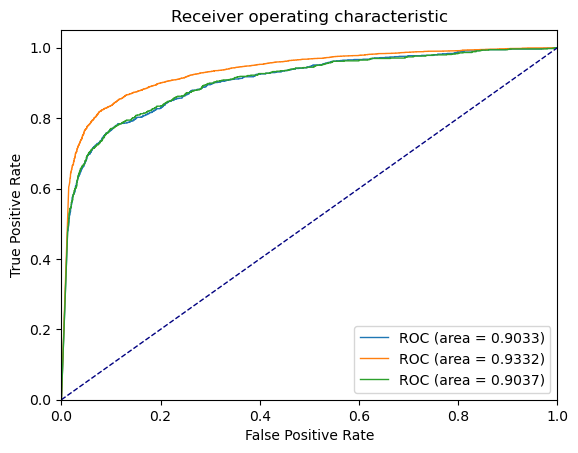


#-------------------Original Data--------------------#

Classification Accuracy: 0.8422
AUC: 0.8245
F1 Score: 0.6458
Precision: 0.5429
Recall: 0.7969
MCC: 0.5657

#-------------------Smote Data--------------------#

Classification Accuracy: 0.8672
AUC: 0.8672
F1 Score: 0.8671
Precision: 0.8676
Recall: 0.8665
MCC: 0.7343

#-------------------Oversampling Data--------------------#

Classification Accuracy: 0.8432
AUC: 0.8268
F1 Score: 0.6493
Precision: 0.5458
Recall: 0.8011
MCC: 0.5698


In [28]:
from sklearn.naive_bayes import GaussianNB


# 5-fold cross-validation
kf = KFold(n_splits=5, random_state=1000, shuffle=True)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#----------------Original--------------#
model = GaussianNB()
y_pred = cross_val_predict(model, X, Y, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#--------------------smote----------------------#
model = GaussianNB()
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#-------------------Oversampling-----------------------#
model = GaussianNB()
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y2_oversampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#----------------Original--------------#
model = GaussianNB()
y_pred = cross_val_predict(model, X, Y, cv=kf)
print("\n#-------------------Original Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y, y_pred))
print("F1 Score: %0.4f" % f1_score(Y, y_pred))
print("Precision: %0.4f" % precision_score(Y, y_pred))
print("Recall: %0.4f" % recall_score(Y, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y, y_pred))

#--------------------smote----------------------#
model = GaussianNB()
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf)
print("\n#-------------------Smote Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y1_resampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y1_resampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y1_resampled, y_pred))
print("Precision: %0.4f" % precision_score(Y1_resampled, y_pred))
print("Recall: %0.4f" % recall_score(Y1_resampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y1_resampled, y_pred))

#-------------------Oversampling-----------------------#
model = GaussianNB()
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf)
print("\n#-------------------Oversampling Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y2_oversampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y2_oversampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y2_oversampled, y_pred))
print("Precision: %0.4f" % precision_score(Y2_oversampled, y_pred))
print("Recall: %0.4f" % recall_score(Y2_oversampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y2_oversampled, y_pred))




## ada boost

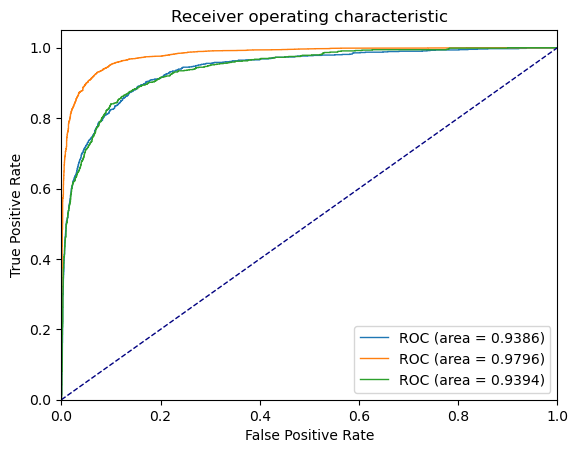


#-------------------Original Data--------------------#

Classification Accuracy: 0.9119
AUC: 0.8204
F1 Score: 0.7352
Precision: 0.8041
Recall: 0.6772
MCC: 0.6865

#-------------------Smote Data--------------------#

Classification Accuracy: 0.9278
AUC: 0.9278
F1 Score: 0.9273
Precision: 0.9330
Recall: 0.9218
MCC: 0.8556

#-------------------Oversampling Data--------------------#

Classification Accuracy: 0.9073
AUC: 0.8131
F1 Score: 0.7223
Precision: 0.7895
Recall: 0.6655
MCC: 0.6706


In [29]:
from sklearn.ensemble import AdaBoostClassifier

# 5-fold cross-validation
kf = KFold(n_splits=5, random_state=1000, shuffle=True)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#----------------Original--------------#
model = AdaBoostClassifier(random_state=100)
y_pred = cross_val_predict(model, X, Y, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#--------------------smote----------------------#
model = AdaBoostClassifier(random_state=100)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#-------------------Oversampling-----------------------#
model = AdaBoostClassifier(random_state=100)
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y2_oversampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#----------------Original--------------#
model = AdaBoostClassifier(random_state=100)
y_pred = cross_val_predict(model, X, Y, cv=kf)
print("\n#-------------------Original Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y, y_pred))
print("F1 Score: %0.4f" % f1_score(Y, y_pred))
print("Precision: %0.4f" % precision_score(Y, y_pred))
print("Recall: %0.4f" % recall_score(Y, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y, y_pred))

#--------------------smote----------------------#
model = AdaBoostClassifier(random_state=100)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf)
print("\n#-------------------Smote Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y1_resampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y1_resampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y1_resampled, y_pred))
print("Precision: %0.4f" % precision_score(Y1_resampled, y_pred))
print("Recall: %0.4f" % recall_score(Y1_resampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y1_resampled, y_pred))

#-------------------Oversampling-----------------------#
model = AdaBoostClassifier(random_state=100)
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf)
print("\n#-------------------Oversampling Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y2_oversampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y2_oversampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y2_oversampled, y_pred))
print("Precision: %0.4f" % precision_score(Y2_oversampled, y_pred))
print("Recall: %0.4f" % recall_score(Y2_oversampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y2_oversampled, y_pred))




## neural network 

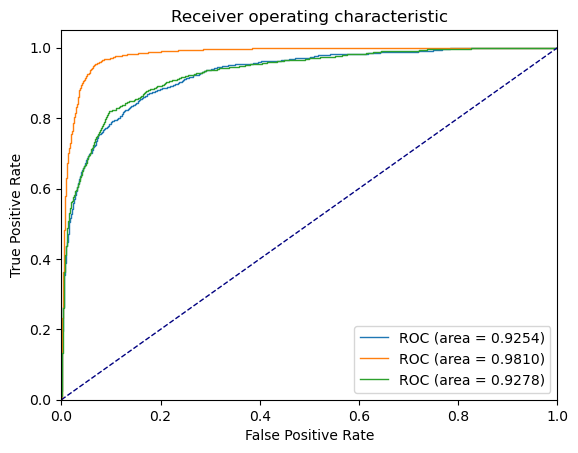


#-------------------Original Data--------------------#

Classification Accuracy: 0.9009
AUC: 0.8120
F1 Score: 0.7104
Precision: 0.7525
Recall: 0.6727
MCC: 0.6524

#-------------------Smote Data--------------------#

Classification Accuracy: 0.9410
AUC: 0.9410
F1 Score: 0.9420
Precision: 0.9263
Recall: 0.9583
MCC: 0.8826

#-------------------Oversampling Data--------------------#

Classification Accuracy: 0.8995
AUC: 0.8110
F1 Score: 0.7079
Precision: 0.7475
Recall: 0.6723
MCC: 0.6488


In [30]:
from sklearn.neural_network import MLPClassifier


# 5-fold cross-validation
kf = KFold(n_splits=5, random_state=1000, shuffle=True)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#----------------Original--------------#
model = MLPClassifier(random_state=100)
y_pred = cross_val_predict(model, X, Y, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#--------------------smote----------------------#
model = MLPClassifier(random_state=100)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#-------------------Oversampling-----------------------#
model = MLPClassifier(random_state=100)
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y2_oversampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#----------------Original--------------#
model = MLPClassifier(random_state=100)
y_pred = cross_val_predict(model, X, Y, cv=kf)
print("\n#-------------------Original Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y, y_pred))
print("F1 Score: %0.4f" % f1_score(Y, y_pred))
print("Precision: %0.4f" % precision_score(Y, y_pred))
print("Recall: %0.4f" % recall_score(Y, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y, y_pred))

#--------------------smote----------------------#
model = MLPClassifier(random_state=100)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf)
print("\n#-------------------Smote Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y1_resampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y1_resampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y1_resampled, y_pred))
print("Precision: %0.4f" % precision_score(Y1_resampled, y_pred))
print("Recall: %0.4f" % recall_score(Y1_resampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y1_resampled, y_pred))

#-------------------Oversampling-----------------------#
model = MLPClassifier(random_state=100)
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf)
print("\n#-------------------Oversampling Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y2_oversampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y2_oversampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y2_oversampled, y_pred))
print("Precision: %0.4f" % precision_score(Y2_oversampled, y_pred))
print("Recall: %0.4f" % recall_score(Y2_oversampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y2_oversampled, y_pred))




## stochastic gradient descent

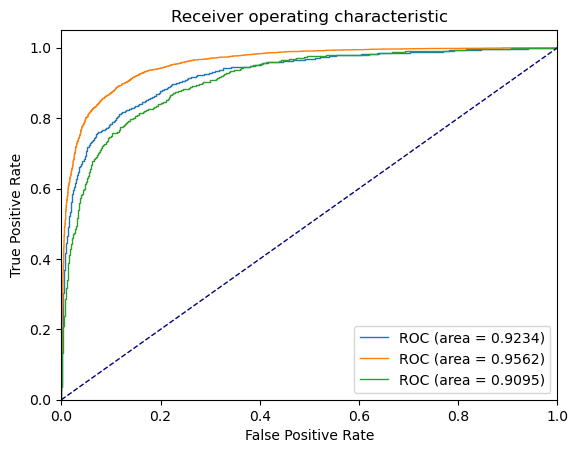


#-------------------Original Data--------------------#

Classification Accuracy: 0.9075
AUC: 0.8135
F1 Score: 0.7224
Precision: 0.7886
Recall: 0.6664
MCC: 0.6707

#-------------------Smote Data--------------------#

Classification Accuracy: 0.8874
AUC: 0.8874
F1 Score: 0.8871
Precision: 0.8896
Recall: 0.8845
MCC: 0.7748

#-------------------Oversampling Data--------------------#

Classification Accuracy: 0.8878
AUC: 0.8074
F1 Score: 0.6876
Precision: 0.6939
Recall: 0.6814
MCC: 0.6193


In [31]:
from sklearn.linear_model import SGDClassifier 


# 5-fold cross-validation
kf = KFold(n_splits=5, random_state=1000, shuffle=True)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#----------------Original--------------#
model = SGDClassifier(random_state=100, loss='log')
y_pred = cross_val_predict(model, X, Y, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#--------------------smote----------------------#
model = SGDClassifier(random_state=100, loss='log')
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

#-------------------Oversampling-----------------------#
model = SGDClassifier(random_state=100, loss='log')
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y2_oversampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#----------------Original--------------#
model = SGDClassifier(random_state=100, loss='log')
y_pred = cross_val_predict(model, X, Y, cv=kf)
print("\n#-------------------Original Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y, y_pred))
print("F1 Score: %0.4f" % f1_score(Y, y_pred))
print("Precision: %0.4f" % precision_score(Y, y_pred))
print("Recall: %0.4f" % recall_score(Y, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y, y_pred))

#--------------------smote----------------------#
model = SGDClassifier(random_state=100, loss='log')
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf)
print("\n#-------------------Smote Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y1_resampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y1_resampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y1_resampled, y_pred))
print("Precision: %0.4f" % precision_score(Y1_resampled, y_pred))
print("Recall: %0.4f" % recall_score(Y1_resampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y1_resampled, y_pred))

#-------------------Oversampling-----------------------#
model = SGDClassifier(random_state=100, loss='log')
y_pred = cross_val_predict(model, X2_oversampled, Y2_oversampled, cv=kf)
print("\n#-------------------Oversampling Data--------------------#\n")
print("Classification Accuracy: %0.4f" % accuracy_score(Y2_oversampled, y_pred))
print("AUC: %0.4f" % roc_auc_score(Y2_oversampled, y_pred))
print("F1 Score: %0.4f" % f1_score(Y2_oversampled, y_pred))
print("Precision: %0.4f" % precision_score(Y2_oversampled, y_pred))
print("Recall: %0.4f" % recall_score(Y2_oversampled, y_pred))
print("MCC: %0.4f" % matthews_corrcoef(Y2_oversampled, y_pred))


## All sampling data

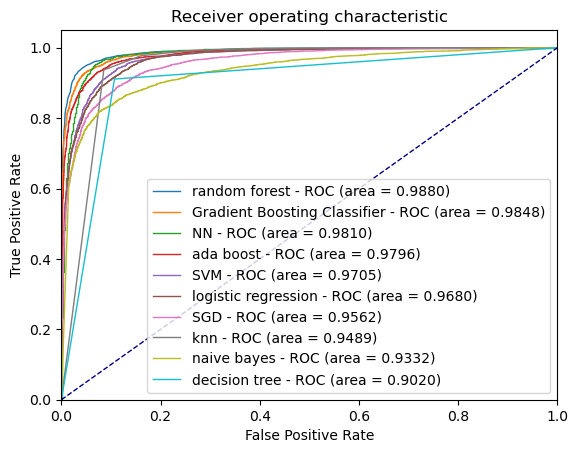

In [32]:
#----------------random forest----smote----------------------#
model = RandomForestClassifier(random_state=1000) 
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='random forest - ROC (area = %0.4f)' % roc_auc)

#-----------------Gradient Boosting Classifier---smote----------------------#
model = GradientBoostingClassifier(random_state=1000)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Gradient Boosting Classifier - ROC (area = %0.4f)' % roc_auc)

#-----------------neural network ---smote----------------------#
model = MLPClassifier(random_state=100)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='NN - ROC (area = %0.4f)' % roc_auc)

#------------------ada boost--smote----------------------#
model = AdaBoostClassifier(random_state=100)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ada boost - ROC (area = %0.4f)' % roc_auc)

#------------------SVM--smote----------------------#
model = svm.SVC(random_state=100, probability=True)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='SVM - ROC (area = %0.4f)' % roc_auc)

#------------------logistic regression--smote----------------------#
model = LogisticRegression()
model.fit(X1_resampled, Y1_resampled)  
y_pred = model.predict_proba(X1_resampled)[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='logistic regression - ROC (area = %0.4f)' % roc_auc)

#-----------------stochastic gradient descent---smote----------------------#
model = SGDClassifier(random_state=100, loss='log')
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='SGD - ROC (area = %0.4f)' % roc_auc)

#------------------knn--smote----------------------#
model = KNeighborsClassifier() ## neighbour = 5
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='knn - ROC (area = %0.4f)' % roc_auc)

#------------------naive bayes--smote----------------------#
model = GaussianNB()
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='naive bayes - ROC (area = %0.4f)' % roc_auc)

#----------------decision tree----smote----------------------#
model = DecisionTreeClassifier(random_state=100)
y_pred = cross_val_predict(model, X1_resampled, Y1_resampled, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_resampled, y_pred, pos_label=1.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='decision tree - ROC (area = %0.4f)' % roc_auc)



plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()